In [1]:
import os, datetime
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras import layers

from datetime import datetime

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 0, 'Gender (0 = F, 1 = M)')

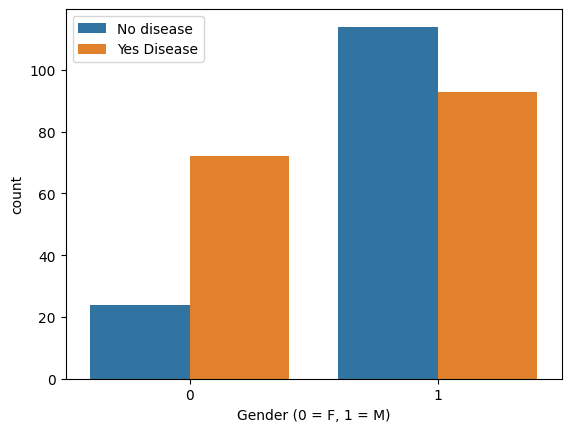

In [10]:
sns.countplot(x='sex', hue='target', data=df)
plt.legend(["No disease", "Yes Disease"])
plt.xlabel('Gender (0 = F, 1 = M)')

In [3]:
features = df.drop('target', axis=1)

In [4]:
target = df[['target']]

In [5]:
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca', 'slope', 'thal', 'restecg']].copy()

In [6]:
numeric_features = features[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()

In [7]:
ss = StandardScaler()
numeric_features = pd.DataFrame(ss.fit_transform(numeric_features), columns = numeric_features.columns, index = numeric_features.index)

In [16]:
numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [8]:
features = pd.concat([numeric_features, categorical_features], axis=1)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [10]:
x_train, x_val, y_train,y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=10)

In [11]:
inputs = keras.Input(shape=(x_train.shape[1],))

In [12]:
dense_layer1 = layers.Dense(12, activation='relu')

In [13]:
x = dense_layer1(inputs)

In [14]:
dropout_layer = layers.Dropout(0.3)

In [15]:
x = dropout_layer(x)

In [16]:
dense_layer2 = layers.Dense(8, activation='relu')

In [17]:
x = dense_layer2(x)

In [18]:
prediction_layer = layers.Dense(1, activation='sigmoid')

In [19]:
prediction = prediction_layer(x)

In [20]:
model = keras.Model(inputs=inputs, outputs=prediction)

In [22]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy', keras.metrics.Precision(0.5), keras.metrics.Recall(0.5),])

In [28]:
dataset = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))

In [30]:
dataset = dataset.batch(16)

In [31]:
dataset.shuffle(12)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 13), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [32]:
epochs = 100

In [33]:
validation = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))

In [34]:
validation = validation.batch(5)

In [36]:
history = model.fit(x = dataset, epochs=epochs, validation_data = validation)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4143 - loss: 0.7498 - precision_2: 0.5005 - recall_2: 0.3364 - val_accuracy: 0.4324 - val_loss: 0.7163 - val_precision_2: 0.4545 - val_recall_2: 0.2500
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4892 - loss: 0.6961 - precision_2: 0.5807 - recall_2: 0.4549 - val_accuracy: 0.4595 - val_loss: 0.7008 - val_precision_2: 0.5000 - val_recall_2: 0.4000
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4934 - loss: 0.6704 - precision_2: 0.5742 - recall_2: 0.5224 - val_accuracy: 0.4865 - val_loss: 0.6878 - val_precision_2: 0.5263 - val_recall_2: 0.5000
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6849 - loss: 0.6458 - precision_2: 0.6999 - recall_2: 0.8043 - val_accuracy: 0.5946 - val_loss: 0.6739 - val_precision_2: 0.6000 - val_recall_2: 0.7500
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5934 - loss: 0.6524 - precision_2: 0.6464 - recall_2: 0.6701 - val

In [37]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision_2', 'recall_2', 'val_accuracy', 'val_loss', 'val_precision_2', 'val_recall_2'])

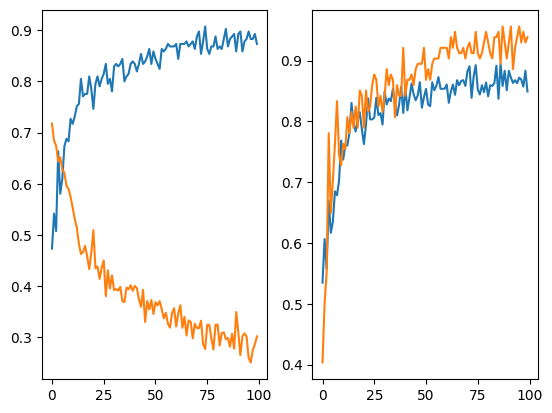

In [39]:
acc = history.history['accuracy']
loss = history.history['loss']

prec = history.history['precision_2']
recall = history.history['recall_2']

plt.subplot(1,2,1)
plt.plot(range(100), acc)
plt.plot(range(100), loss)

plt.subplot(1,2,2)
plt.plot(range(100), prec)
plt.plot(range(100), recall)

In [40]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7298 - loss: 0.5191 - precision_2: 0.7102 - recall_2: 0.7863 


[0.6245442628860474, 0.688524603843689, 0.6764705777168274, 0.7419354915618896]

In [43]:
y_pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [44]:
y_pred = np.where(y_pred>=0.5 , 1, y_pred)

In [45]:
y_pred = np.where(y_pred<0.5 , 0, y_pred)

In [47]:
result = pd.DataFrame({'y_test' : y_test.values.flatten(), 'y_pred' : y_pred.flatten().astype('int32')})

In [50]:
pd.crosstab(result.y_pred, result.y_test)

y_test,0,1
y_pred,,
0,19,8
1,11,23
